In [1]:
#imports

# Scikit-learn module for PCA
from sklearn import decomposition

# Custom csv processor for importing data from csv
import utility.csv_process as reader

# Numpy for matrix manipulation
import numpy as np

# For 2d graphing
from matplotlib import pyplot as plt

# For 3d graphing
from mpl_toolkits.mplot3d import Axes3D

# For building paths
from os import path


In [2]:
print(reader.cont_read(path.join('data', 'log_gait_1_RW.csv'))[0])

['0', '110842', '-0.7058554', '0.7256971', '3.380139', '351.1101', '302.4455', '0.4420095', '-0.1177014', '0.9274712', '2.17749', '2.340594', '200.9999', '358.2526', '-0.01240341', '0.8430886', '2.149966', '341.4661', '197.1918', '2.688683', '-0.209262', '0.8366579', '2.225815', '354.9681', '198.4326', '1.197485', '-0.06005249', '0.405381', '2.027842', '8.789762', '198.4415', '2.579454', '-0.2375736', '0.3809294', '2.208998', '61.31966', '200.7191', '2.486148', '-0.06086905', '-0.05520076', '2.105863', '4.473784', '201.2251', '359.6437', '-0.1070456', '0.1590695', '2.598824', '58.69044', '143.846', '315.9868', '-0.1218427', '1.023439', '2.174878', '2.393353', '191.8018', '359.1036', '-0.1327461', '1.372713', '2.149477', '2.533469', '185.2531', '359.3982', '-0.133355', '1.493842', '2.156701', '2.450748', '184.8201', '359.1331', '-0.1352226', '1.593779', '2.152566', '0.1892272', '177.1773', '354.4995', '-0.08335489', '1.414368', '2.155635', '4.759307', '173.7101', '4.396482', '-0.1810321

In [3]:
#read csvs into np arrays

rw_1 = np.array(reader.cont_read(path.join('data', 'log_gait_1_RW.csv')), dtype = 'float64')
vr_1 = np.array(reader.cont_read(path.join('data', 'log_gait_1_VR.csv')), dtype = 'float64')
rw_2 = np.array(reader.cont_read(path.join('data', 'log_gait_2_RW.csv')), dtype = 'float64')
vr_2 = np.array(reader.cont_read(path.join('data', 'log_gait_2_VR.csv')), dtype = 'float64')


In [4]:
#get the shapes of the separate datasets

print('rw_1:', rw_1.shape, 'vr_1:', vr_1.shape, 'rw_2:', rw_2.shape, 'vr_2:', vr_2.shape,)

rw_1: (2559, 104) vr_1: (3934, 104) rw_2: (2258, 104) vr_2: (2607, 104)


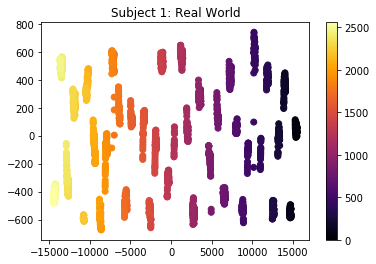

In [5]:
rw_1_rounded = np.around(rw_1, decimals = 15)


#pca + visualize rw_1 in 2 dimensions
pca = decomposition.PCA(n_components = 2)
rw_1_components = pca.fit_transform(rw_1_rounded)

#graph 2-d PCA of rw_1
rw_1_x = rw_1_components[:, 0]
rw_1_y = rw_1_components[:, 1]
rw_1_t = np.arange(len(rw_1_x))
plt.scatter(rw_1_x, rw_1_y, c=rw_1_t, cmap = "inferno")
plt.colorbar()
plt.title("Subject 1: Real World")
plt.show()


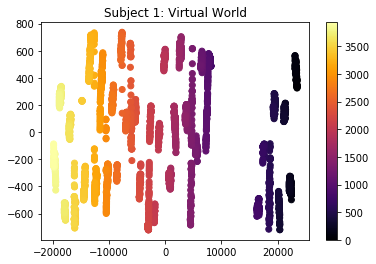

In [6]:
vr_1_rounded = np.around(vr_1, decimals = 15)


#pca + visualize vr_1 in 2 dimensions
pca = decomposition.PCA(n_components = 2)
vr_1_components = pca.fit_transform(vr_1_rounded)

#graph 2-d PCA of vr_1
vr_1_x = vr_1_components[:, 0]
vr_1_y = vr_1_components[:, 1]
vr_1_t = np.arange(len(vr_1_x))
plt.scatter(vr_1_x, vr_1_y, c=vr_1_t, cmap = "inferno")
plt.colorbar()
plt.title("Subject 1: Virtual World")
plt.show()


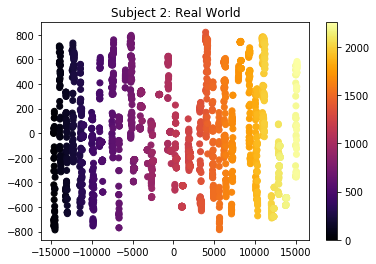

In [7]:
rw_2_rounded = np.around(rw_2, decimals = 15)


#pca + visualize rw_1 in 2 dimensions
pca = decomposition.PCA(n_components = 2)
rw_2_components = pca.fit_transform(rw_2_rounded)

#graph 2-d PCA of rw_2
rw_2_x = rw_2_components[:, 0]
rw_2_y = rw_2_components[:, 1]
rw_2_t = np.arange(len(rw_2_x))
plt.scatter(rw_2_x, rw_2_y, c=rw_2_t, cmap = "inferno")
plt.colorbar()
plt.title("Subject 2: Real World")
plt.show()


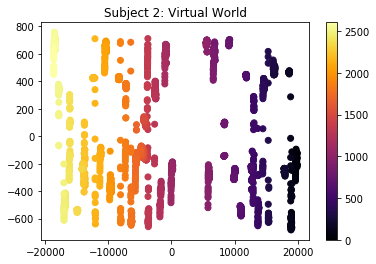

In [8]:
vr_2_rounded = np.around(vr_2, decimals = 15)


#pca + visualize vr_1 in 2 dimensions
pca = decomposition.PCA(n_components = 2)
vr_2_components = pca.fit_transform(vr_2_rounded)

#graph 2-d PCA of vr_1
vr_2_x = vr_2_components[:, 0]
vr_2_y = vr_2_components[:, 1]
vr_2_t = np.arange(len(vr_2_x))
plt.scatter(vr_2_x, vr_2_y, c=vr_2_t, cmap = "inferno")
plt.colorbar()
plt.title("Subject 2: Virtual World")
plt.show()


In [9]:
#stack our datasets: 

data = np.vstack((rw_1_rounded, vr_1_rounded, rw_2_rounded, vr_2_rounded))
data.shape

(11358, 104)

In [10]:
#Do pca on the combined dataset - we will do two versions: one with 3 components and one with 2 components
pca = decomposition.PCA(n_components=3)

stacked_3_components = pca.fit_transform(data)

pca = decomposition.PCA(n_components=2)

stacked_2_components = pca.fit_transform(data)

In [11]:
#split the dataset back into classes

rw_1_stacked_2 = stacked_2_components[0:len(rw_1_rounded)]
vr_1_stacked_2 = stacked_2_components[0+len(rw_1_rounded):len(rw_1_rounded)+len(vr_1_rounded)]
rw_2_stacked_2 = stacked_2_components[0+len(rw_1_rounded)+len(vr_1_rounded):len(rw_1_rounded)+len(vr_1_rounded)+len(rw_2_rounded)]
vr_2_stacked_2 = stacked_2_components[0+len(rw_1_rounded)+len(vr_1_rounded)+len(vr_2_rounded):len(rw_1_rounded)+len(vr_1_rounded)+len(rw_2_rounded)+len(vr_2_rounded)]
print('rw_1_stacked_2', rw_1_stacked_2.shape, 'vr_1_stacked_2', vr_1_stacked_2.shape, 'rw_2_stacked_2', rw_2_stacked_2.shape, 'vr_2_stacked_2', vr_2_stacked_2.shape)

rw_1_stacked_2 (2559, 2) vr_1_stacked_2 (3934, 2) rw_2_stacked_2 (2258, 2) vr_2_stacked_2 (2258, 2)


In [12]:
#split the dataset back into classes

rw_1_stacked_3 = stacked_3_components[0:len(rw_1_rounded)]
vr_1_stacked_3 = stacked_3_components[0+len(rw_1_rounded):len(rw_1_rounded)+len(vr_1_rounded)]
rw_2_stacked_3 = stacked_3_components[0+len(rw_1_rounded)+len(vr_1_rounded):len(rw_1_rounded)+len(vr_1_rounded)+len(rw_2_rounded)]
vr_2_stacked_3 = stacked_3_components[0+len(rw_1_rounded)+len(vr_1_rounded)+len(vr_2_rounded):len(rw_1_rounded)+len(vr_1_rounded)+len(rw_2_rounded)+len(vr_2_rounded)]
print('rw_1_stacked_3', rw_1_stacked_3.shape, 'vr_1_stacked_3', vr_1_stacked_3.shape, 'rw_2_stacked_3', rw_2_stacked_3.shape, 'vr_2_stacked_3', vr_2_stacked_3.shape)

rw_1_stacked_3 (2559, 3) vr_1_stacked_3 (3934, 3) rw_2_stacked_3 (2258, 3) vr_2_stacked_3 (2258, 3)


In [13]:
#split 2d data into x,y components

rw_1_stacked_2_x = rw_1_stacked_2[:, 0]
rw_1_stacked_2_y = rw_1_stacked_2[:, 1]

vr_1_stacked_2_x = vr_1_stacked_2[:, 0]
vr_1_stacked_2_y = vr_1_stacked_2[:, 1]


rw_2_stacked_2_x = rw_2_stacked_2[:, 0]
rw_2_stacked_2_y = rw_2_stacked_2[:, 1]

vr_2_stacked_2_x = vr_2_stacked_2[:, 0]
vr_2_stacked_2_y = vr_2_stacked_2[:, 1]


In [14]:
#split 3d data into x,y,z components
rw_1_stacked_3_x = rw_1_stacked_3[:, 0]
rw_1_stacked_3_y = rw_1_stacked_3[:, 1]
rw_1_stacked_3_z = rw_1_stacked_3[:, 2]

vr_1_stacked_3_x = vr_1_stacked_3[:, 0]
vr_1_stacked_3_y = vr_1_stacked_3[:, 1]
vr_1_stacked_3_z = vr_1_stacked_3[:, 2]

rw_2_stacked_3_x = rw_2_stacked_3[:, 0]
rw_2_stacked_3_y = rw_2_stacked_3[:, 1]
rw_2_stacked_3_z = rw_2_stacked_3[:, 2]

vr_2_stacked_3_x = vr_2_stacked_3[:, 0]
vr_2_stacked_3_y = vr_2_stacked_3[:, 1]
vr_2_stacked_3_z = vr_2_stacked_3[:, 2]

In [15]:
#Make  the 2d plot for graphing:

fig = plt.figure()
ax = fig.add_subplot(111)


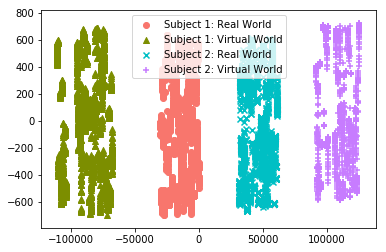

In [16]:
ax.scatter(rw_1_stacked_2_x, rw_1_stacked_2_y, c='#F8766D', marker = "o", label = 'Subject 1: Real World')
ax.scatter(vr_1_stacked_2_x, vr_1_stacked_2_y, c='#7C8E00', marker = "^", label = 'Subject 1: Virtual World')
ax.scatter(rw_2_stacked_2_x, rw_2_stacked_2_y, c='#00BFC4', marker = "x", label = 'Subject 2: Real World')
ax.scatter(vr_2_stacked_2_x, vr_2_stacked_2_y, c='#C77CFF', marker = "+", label = 'Subject 2: Virtual World')


plt.legend(loc = 'best'); 
plt.show()

In [17]:
#Make the 3d plot so we can graph

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


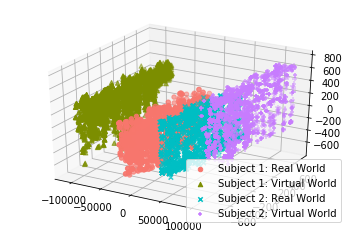

In [18]:
#add each dataset to the 3d plot and then graph
ax.scatter(rw_1_stacked_3_x, rw_1_stacked_3_y, rw_1_stacked_3_z, c='#F8766D', marker = "o", label = 'Subject 1: Real World')
ax.scatter(vr_1_stacked_3_x, vr_1_stacked_3_y, vr_1_stacked_3_z, c='#7C8E00', marker = "^", label = 'Subject 1: Virtual World')
ax.scatter(rw_2_stacked_3_x, rw_2_stacked_3_y, rw_2_stacked_3_z, c='#00BFC4', marker = "x", label = 'Subject 2: Real World')
ax.scatter(vr_2_stacked_3_x, vr_2_stacked_3_y, vr_2_stacked_3_z, c='#C77CFF', marker = "+", label = 'Subject 2: Virtual World')


plt.legend(loc = 'best'); 
plt.show()